In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1. Take a bunch of samples from the color sensor - making sure they are all the same length
    1. this can be samples of one piece - where the category is the color
    2. this can be samples of several pieces - where the category could be the number of pieces
2. Make an excel/csv file with all the samples...have a header row with the feature names and the target name for each
3. Test the classifier by...
    1. load the data
    2. split it into train and test
    3. fit with the train, test with the test
5. Now that you know it works, then try it from the beginning...
    1. measure a new sample - make sure it is the same length as the training samples
    2. using the trained classifier to predict the target
    3. convert the result to a Game simulator board, or state that you need

## Take a bunch of samples from the color sensor - making sure they are all the same length

I'm going to make some fake data here, assuming you're measuring across one pile in nim and want to predict the number of sticks.

(0, 1)

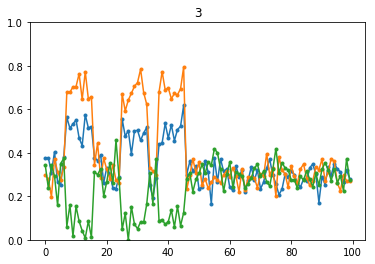

In [2]:
background=[.3,.3,.3]
stick=[.5,.7,.1]
sigma=0.05

N=randint(0,5+1)
loc=arange(N)*15+10 + randint(-5,5,N)
width=5

data=[]
for i in range(100):
    idx=where(((i-width)<loc) & (loc<(i+width)))[0]
    if len(idx)==0:
        color=array(background)
    else:
        color=array(stick)
        
    color=color+randn(3)*sigma
    color[color<0]=0
    color[color>1]=1
    
    data.append(color)
data=array(data)
plot(data[:,0],'.-')
plot(data[:,1],'.-')
plot(data[:,2],'.-')
title(N)
ylim([0,1])

In [3]:
im=repeat(data[newaxis,:,:],5,axis=0)
imsave('data/fake_image1.png',im)

In [4]:
def make_fake_vector():

    background=[.2,.2,.2]
    stick=array([51, 189, 32 ])/255
    
    sigma=0.01
    width=2
    width_error=1
    

    N=randint(0,4+1)
    loc=arange(N)*15+10 + randint(-width_error,width_error,N)

    data=[]
    for i in range(100):
        idx=where(((i-width)<=loc) & (loc<=(i+width)))[0]
        if len(idx)==0:
            color=array(background)
        else:
            color=array(stick)

        color=color+randn()*sigma
        color[color<0]=0
        color[color>1]=1

        data.append(color)

    data=array(data)
    im=repeat(data[newaxis,:,:],5,axis=0)

    return im,N


In [5]:
im,N=make_fake_vector()
imsave('data/fake_image1.png',im)
N

0

In [6]:
for i in range(200):
    im,N=make_fake_vector()
    imsave('all_color_sequences/%d/fake_image%d.png' % (N,i),im)

In [7]:
from classy import *

Keras not installed
Version:  0.0.21


In [8]:
images_all=image.load_images('all_color_sequences')

[0]: 54 files found
[1]: 69 files found
[2]: 75 files found
[3]: 70 files found
[4]: 69 files found


In [9]:
images_train,images_test=image.split(images_all)

Files in Test Set:
	 all_color_sequences/0/fake_image67.png,all_color_sequences/0/fake_image73.png,all_color_sequences/0/fake_image76.png,all_color_sequences/0/fake_image62.png,all_color_sequences/0/fake_image167.png,all_color_sequences/0/fake_image38.png,all_color_sequences/0/fake_image4.png,all_color_sequences/0/fake_image40.png,all_color_sequences/0/fake_image74.png,all_color_sequences/0/fake_image47.png,all_color_sequences/0/fake_image29.png,all_color_sequences/1/fake_image0.png,all_color_sequences/1/fake_image132.png,all_color_sequences/1/fake_image3.png,all_color_sequences/1/fake_image30.png,all_color_sequences/1/fake_image27.png,all_color_sequences/1/fake_image147.png,all_color_sequences/1/fake_image114.png,all_color_sequences/1/fake_image97.png,all_color_sequences/1/fake_image22.png,all_color_sequences/1/fake_image164.png,all_color_sequences/1/fake_image117.png,all_color_sequences/1/fake_image187.png,all_color_sequences/1/fake_image28.png,all_color_sequences/1/fake_image43.png,

In [10]:
#images_train=image.load_images('train_pieces')
summary(images_train)

#images_test=image.load_images('test_pieces')
summary(images_test)


Images
70 images of shape (5, 100, 3)
Target values given.
Target names: '0', '1', '2', '3', '4'
Images
267 images of shape (5, 100, 3)
Target values given.
Target names: '0', '1', '2', '3', '4'


In [11]:
data_train=image.images_to_vectors(images_train)
if any(data_train.vectors>1):
    print("\nScaling down...")
    data_train.vectors/=255.0
    summary(data_train)
    
print("=====================")

data_test=image.images_to_vectors(images_test)
if any(data_test.vectors>1):
    print("\nScaling down...")
    data_test.vectors/=255.0
    summary(data_train)
summary(data_test)
    
    
    
data_train,data_test=remap_targets(data_train,data_test,
            ['0','1','2','3','4'])  # make sure the targets match


70 vectors of length 1500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p1495', 'p1496', 'p1497', 'p1498', 'p1499'  (1500 features)
Target values given.
Target names: '0', '1', '2', '3', '4'
Mean:  [50.44285714 50.44285714 50.44285714 ... 51.27142857 51.27142857
 51.27142857]
Median:  [51. 51. 51. ... 50. 50. 50.]
Stddev:  [8.05983997 8.05983997 8.05983997 ... 9.32419499 9.32419499 9.32419499]

Scaling down...
70 vectors of length 1500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p1495', 'p1496', 'p1497', 'p1498', 'p1499'  (1500 features)
Target values given.
Target names: '0', '1', '2', '3', '4'
Mean:  [0.19781513 0.19781513 0.19781513 ... 0.20106443 0.20106443 0.20106443]
Median:  [0.2        0.2        0.2        ... 0.19607843 0.19607843 0.19607843]
Stddev:  [0.03160722 0.03160722 0.03160722 ... 0.03656547 0.03656547 0.03656547]
267 vectors of length 1500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p1495', 'p1496', 'p1497', 'p1498', 'p1499'  (1500 feat

In [29]:
C=NaiveBayes()
# or...
#C=kNearestNeighbor()
#C=CSC()

In [30]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.003307819366455078 seconds ')


In [31]:
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Test Set: 90.2621722846442


In [32]:
wrong=where(np.logical_not(C.predict(data_test.vectors)==data_test.targets))[0]

Text(0.5,1,'1')

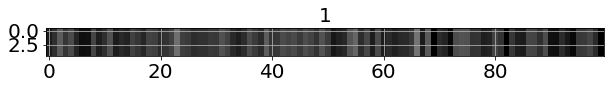

In [33]:
vec=data_test.vectors[wrong[0]]
image.vector_to_image(vec,images_all.data[0].shape)

prediction=data_test.target_names[C.predict(atleast_2d(vec))[0]]

title(prediction)

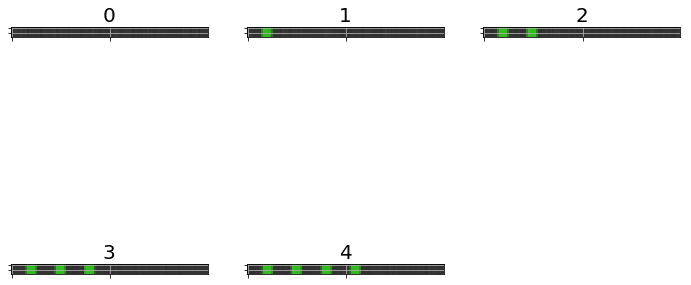

In [34]:
figure(figsize=(12,8))
for i in range(5):
    subplot(2,3,i+1)

    im=image.vector_to_image(C.means[i],images_all.data[0].shape)
    gca().set_xticklabels([])
    gca().set_yticklabels([])
    title(i)